<a href="https://colab.research.google.com/github/CueSpaceFruit/CueSpaceFruit/blob/main/OCR_trial_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Env krn py38 mconda ppdl

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!which python #view python location
!python --version #view the python version
!python -m pip --version #view pip

/usr/local/bin/python
Python 3.10.12
pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.10
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.13
albumentations                     1.4.10
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astor                              0.8.1
astropy                            6.1.7
astropy-iers-data                  0.2024.12.9.0.36.21
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs               

In [ ]:
pip freeze | grep opencv

opencv-contrib-python==4.10.0.84
opencv-python==4.10.0.84
opencv-python-headless==4.10.0.84


In [ ]:
!python3 -m pip install paddlepaddle #-gpu #==2.3.0.post112 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!pip install "paddleocr"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114

In [ ]:
from paddleocr import PaddleOCR, draw_ocr

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 22.2 MB/s eta 0:00:00


In [ ]:
import easyocr

In [ ]:
from dataclasses import dataclass
import os
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
plt.rcParams['figure.figsize']=[40,25]

import numpy as np
import json

In [ ]:
def show_im(img_path):
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
def check_img_ext(path: str, accepted_extensions: list) -> bool:
    """
    Helper function to add only extensions in the directory in a predefined list.
    """
    return any(path.endswith(ending) for ending in accepted_extensions)

def ocr_paths_ls(image_directory: str, included_extensions: list) -> list:
    """
    This returns a list of paths for a given a folder where the images that are to be ocr'd are stored

    Args:
        image_directory (str): the directory of images to be ocr'd
        included_extensions (list of str): extensions that would be included into the list for ocr'ing

    Returns:
        ocr_paths (list): a list of paths used for looping through for ocr
    """
    ocr_paths = []
    directory = os.fsencode(image_directory)

    for file in os.listdir(directory):
        path_name = os.fsdecode(os.path.join(directory, file))
        if check_img_ext(path_name, included_extensions):
            ocr_paths.append(path_name)

    return ocr_paths

In [ ]:
def ocr_output(input_path: str, output_subdirectory: str):
    """
    Takes in the input path and file name and provide an output path with constructed by adding a suffix to the file name and into an output directory.
    """

    image_bbox_suffix = "_bb"
    bbox_txt_suffix = "_bb_txt"

    ext = "." + input_path.split('.')[-1]
    fname = (input_path.split('/')[-1]).split('.')[0]
    fdirectory = "/".join(input_path.split('/')[0:-1])

    image_and_bbox = "/".join([fdirectory, output_subdirectory, fname + image_bbox_suffix + ext])
    bbox_and_text = "/".join([fdirectory, output_subdirectory, fname + bbox_txt_suffix + ext])

    return image_and_bbox, bbox_and_text

In [ ]:
def bbox_txt_canvas(pixel_ht:int = 1000, pixel_w: int = 1500, canvas_rgb_value: int = 255):
    """
    This helper function provides a white canvas for the text detected boxes and the extracted text to be visualised
    """
    blank_canvas = np.full((pixel_ht, pixel_w,3), canvas_rgb_value, np.uint8)                                                                           # blank canvas to draw the text
    return blank_canvas

def run_ocr(ocr_path: str
            , ocr_eng: str
            , show_boundbox_image: bool = False
            , bbox_txt_offset: int = 13
            , txt_size: float = 0.35
            , txt_thickness:int = 1
            , bbox_thickness:int = 1
            , bbox_colour: tuple = (0, 255, 0)
           ):
    """
    Run ocr over the image from the path to the image, draw bounding boxes and extract text. The original image is saved with bounding boxes and
    another image created showing only the bounding box and extracted tet without the original image.
    """

    img = cv2.imread(ocr_path)
    h, w, c = img.shape
    bbox_and_txt_only = bbox_txt_canvas(h,w)

    if ocr_eng == "paddle":
        output_subdirectory = "pddl_outp"
        ocr = PaddleOCR(use_angle_cls=True, lang="en")                                                                                                      # instantiate paddleocr
        result = ocr.ocr(ocr_path, cls=True)

        #this box breakdown is to work with colab and paddle ocr
        for line in result[0]:
            bbox, text, score = line[0], line[1][0], line[1][1]
            x = bbox[0][0]
            y = bbox[0][1]
            x1 = bbox[2][0]
            y1 = bbox[2][1]

            cv2.rectangle(img, (int(x), int(y)), (int(x1), int(y1)), bbox_colour,bbox_thickness)
            cv2.rectangle(bbox_and_txt_only, (int(x), int(y)), (int(x1), int(y1)), bbox_colour,bbox_thickness)
            cv2.putText(bbox_and_txt_only, text, (int(x), int(y + bbox_txt_offset)), cv2.FONT_HERSHEY_SIMPLEX, txt_size, (0, 0 ,0), txt_thickness)

    if ocr_eng == "easyocr":
        output_subdirectory = "easyocr_outp"
        reader = easyocr.Reader(['en'])                                                                                                                     # instantiate easyocr
        result = reader.readtext(ocr_path)

        # this box break down was used for AI sandbox easyocr
        for line in result:
            bbox, text, score = line
            x = bbox[0][0]
            y = bbox[0][1]
            x1 = bbox[2][0]
            y1 = bbox[2][1]

            cv2.rectangle(img, (int(x), int(y)), (int(x1), int(y1)), bbox_colour,bbox_thickness)
            cv2.rectangle(bbox_and_txt_only, (int(x), int(y)), (int(x1), int(y1)), bbox_colour,bbox_thickness)
            cv2.putText(bbox_and_txt_only, text, (int(x), int(y + bbox_txt_offset)), cv2.FONT_HERSHEY_SIMPLEX, txt_size, (0, 0 ,0), txt_thickness)

    """ # this box break down was used for AI sandbox paddle
    for line in result:
        bbox, text, score = line[0], line[1][0], line[1][1]
        x = bbox[0][0]
        y = bbox[0][1]
        x1 = bbox[2][0]
        y1 = bbox[2][1]
    """

    image_and_bbox, bbox_and_text = ocr_output(ocr_path, output_subdirectory)

    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.savefig(image_and_bbox, bbox_inches='tight')
    plt.imshow(cv2.cvtColor(bbox_and_txt_only, cv2.COLOR_BGR2RGB))
    plt.savefig(bbox_and_text, bbox_inches='tight', dpi=200)

    if show_boundbox_image == True:
        show_im(image_and_bbox)
        show_im(bbox_and_text)

[2024/12/17 02:31:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

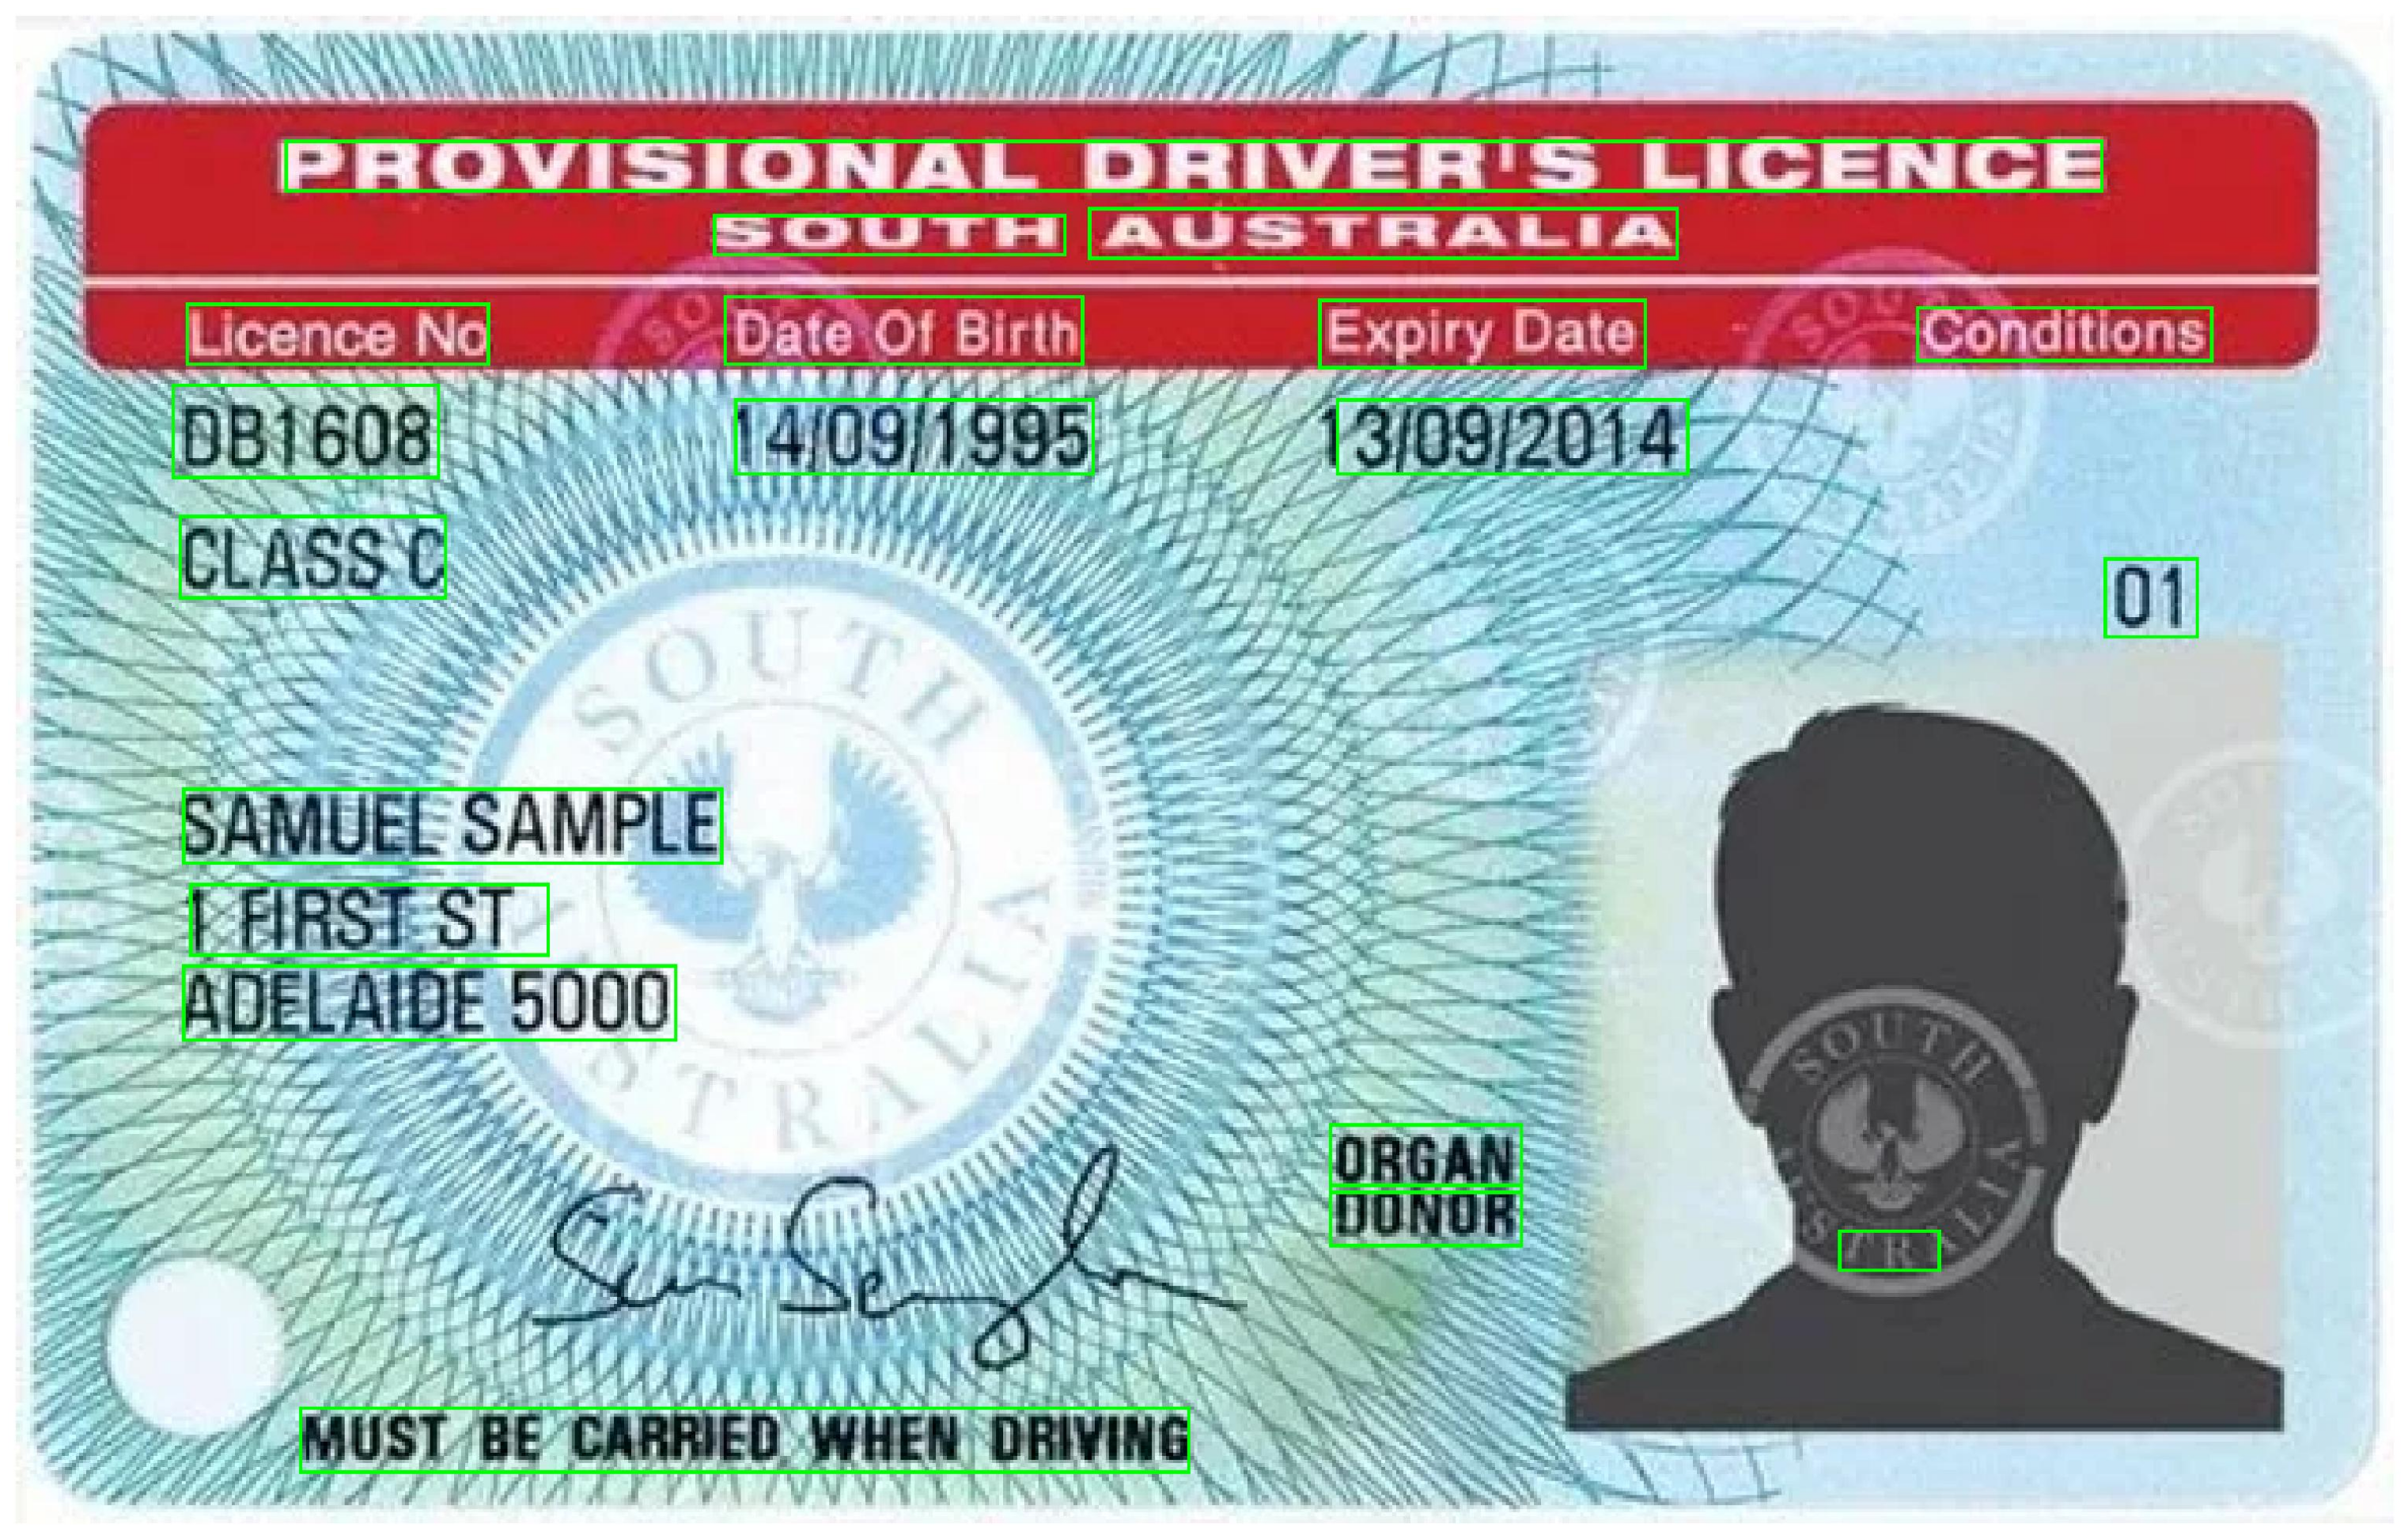

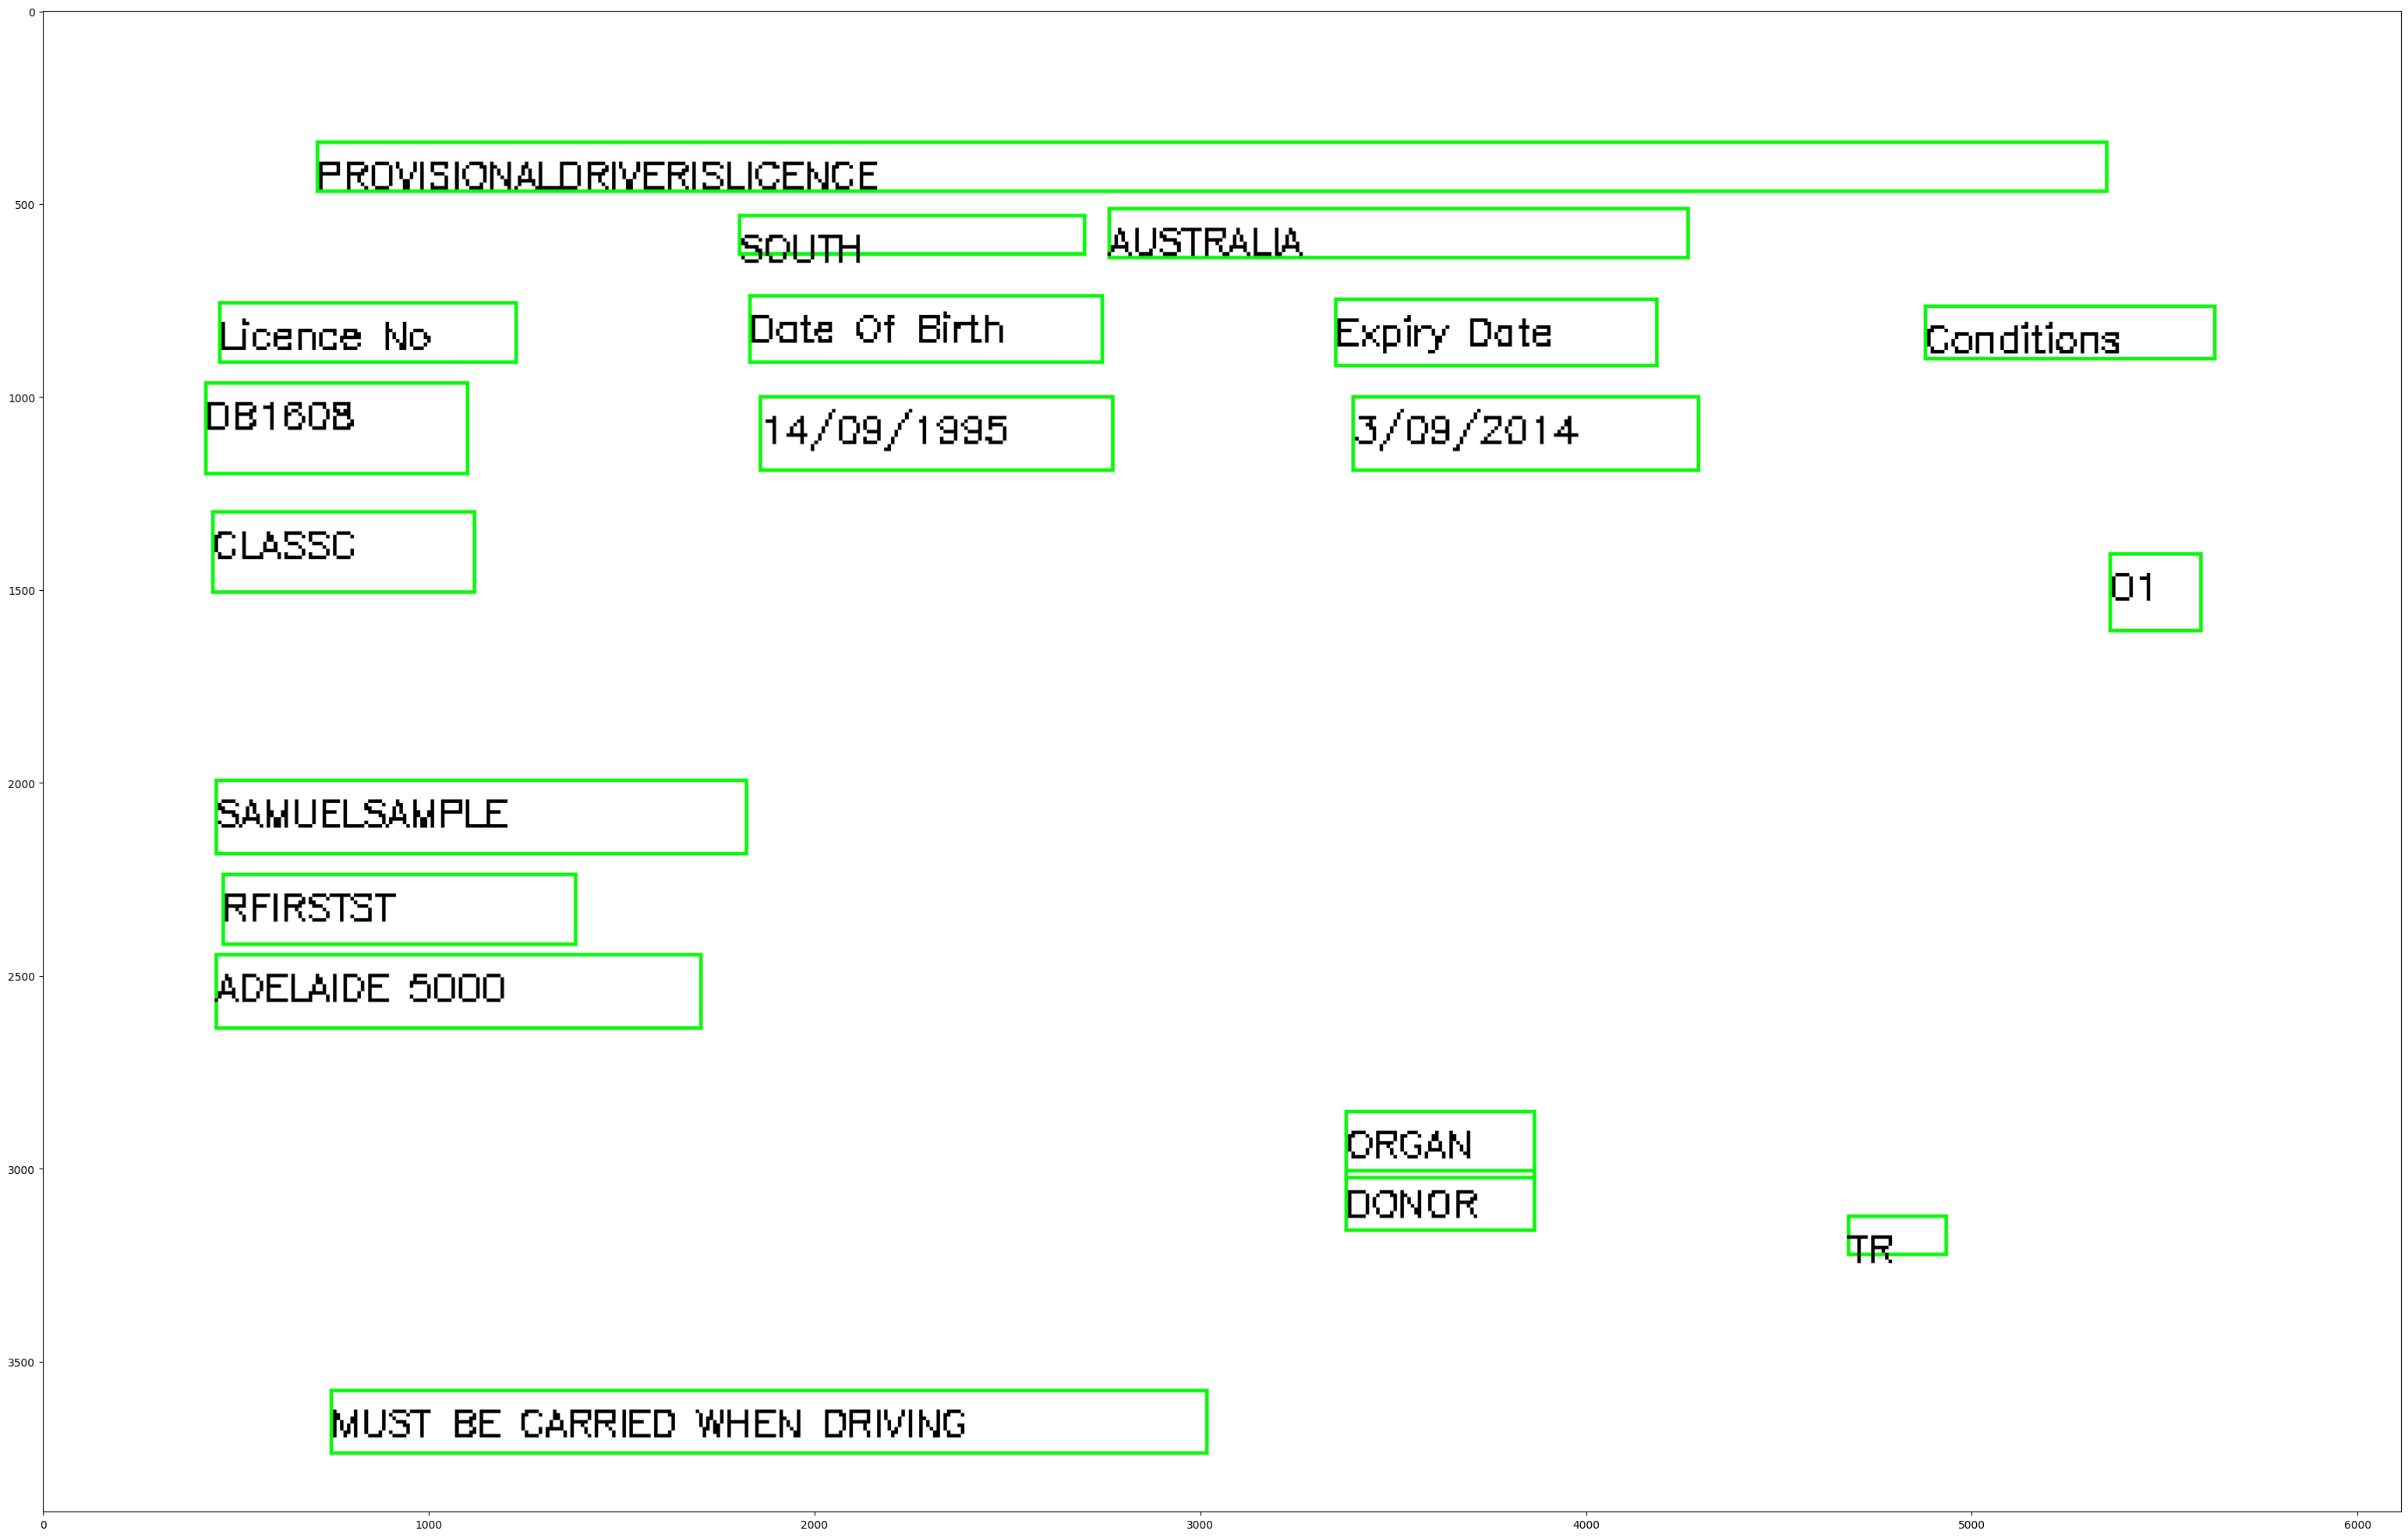

[2024/12/17 02:32:02] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

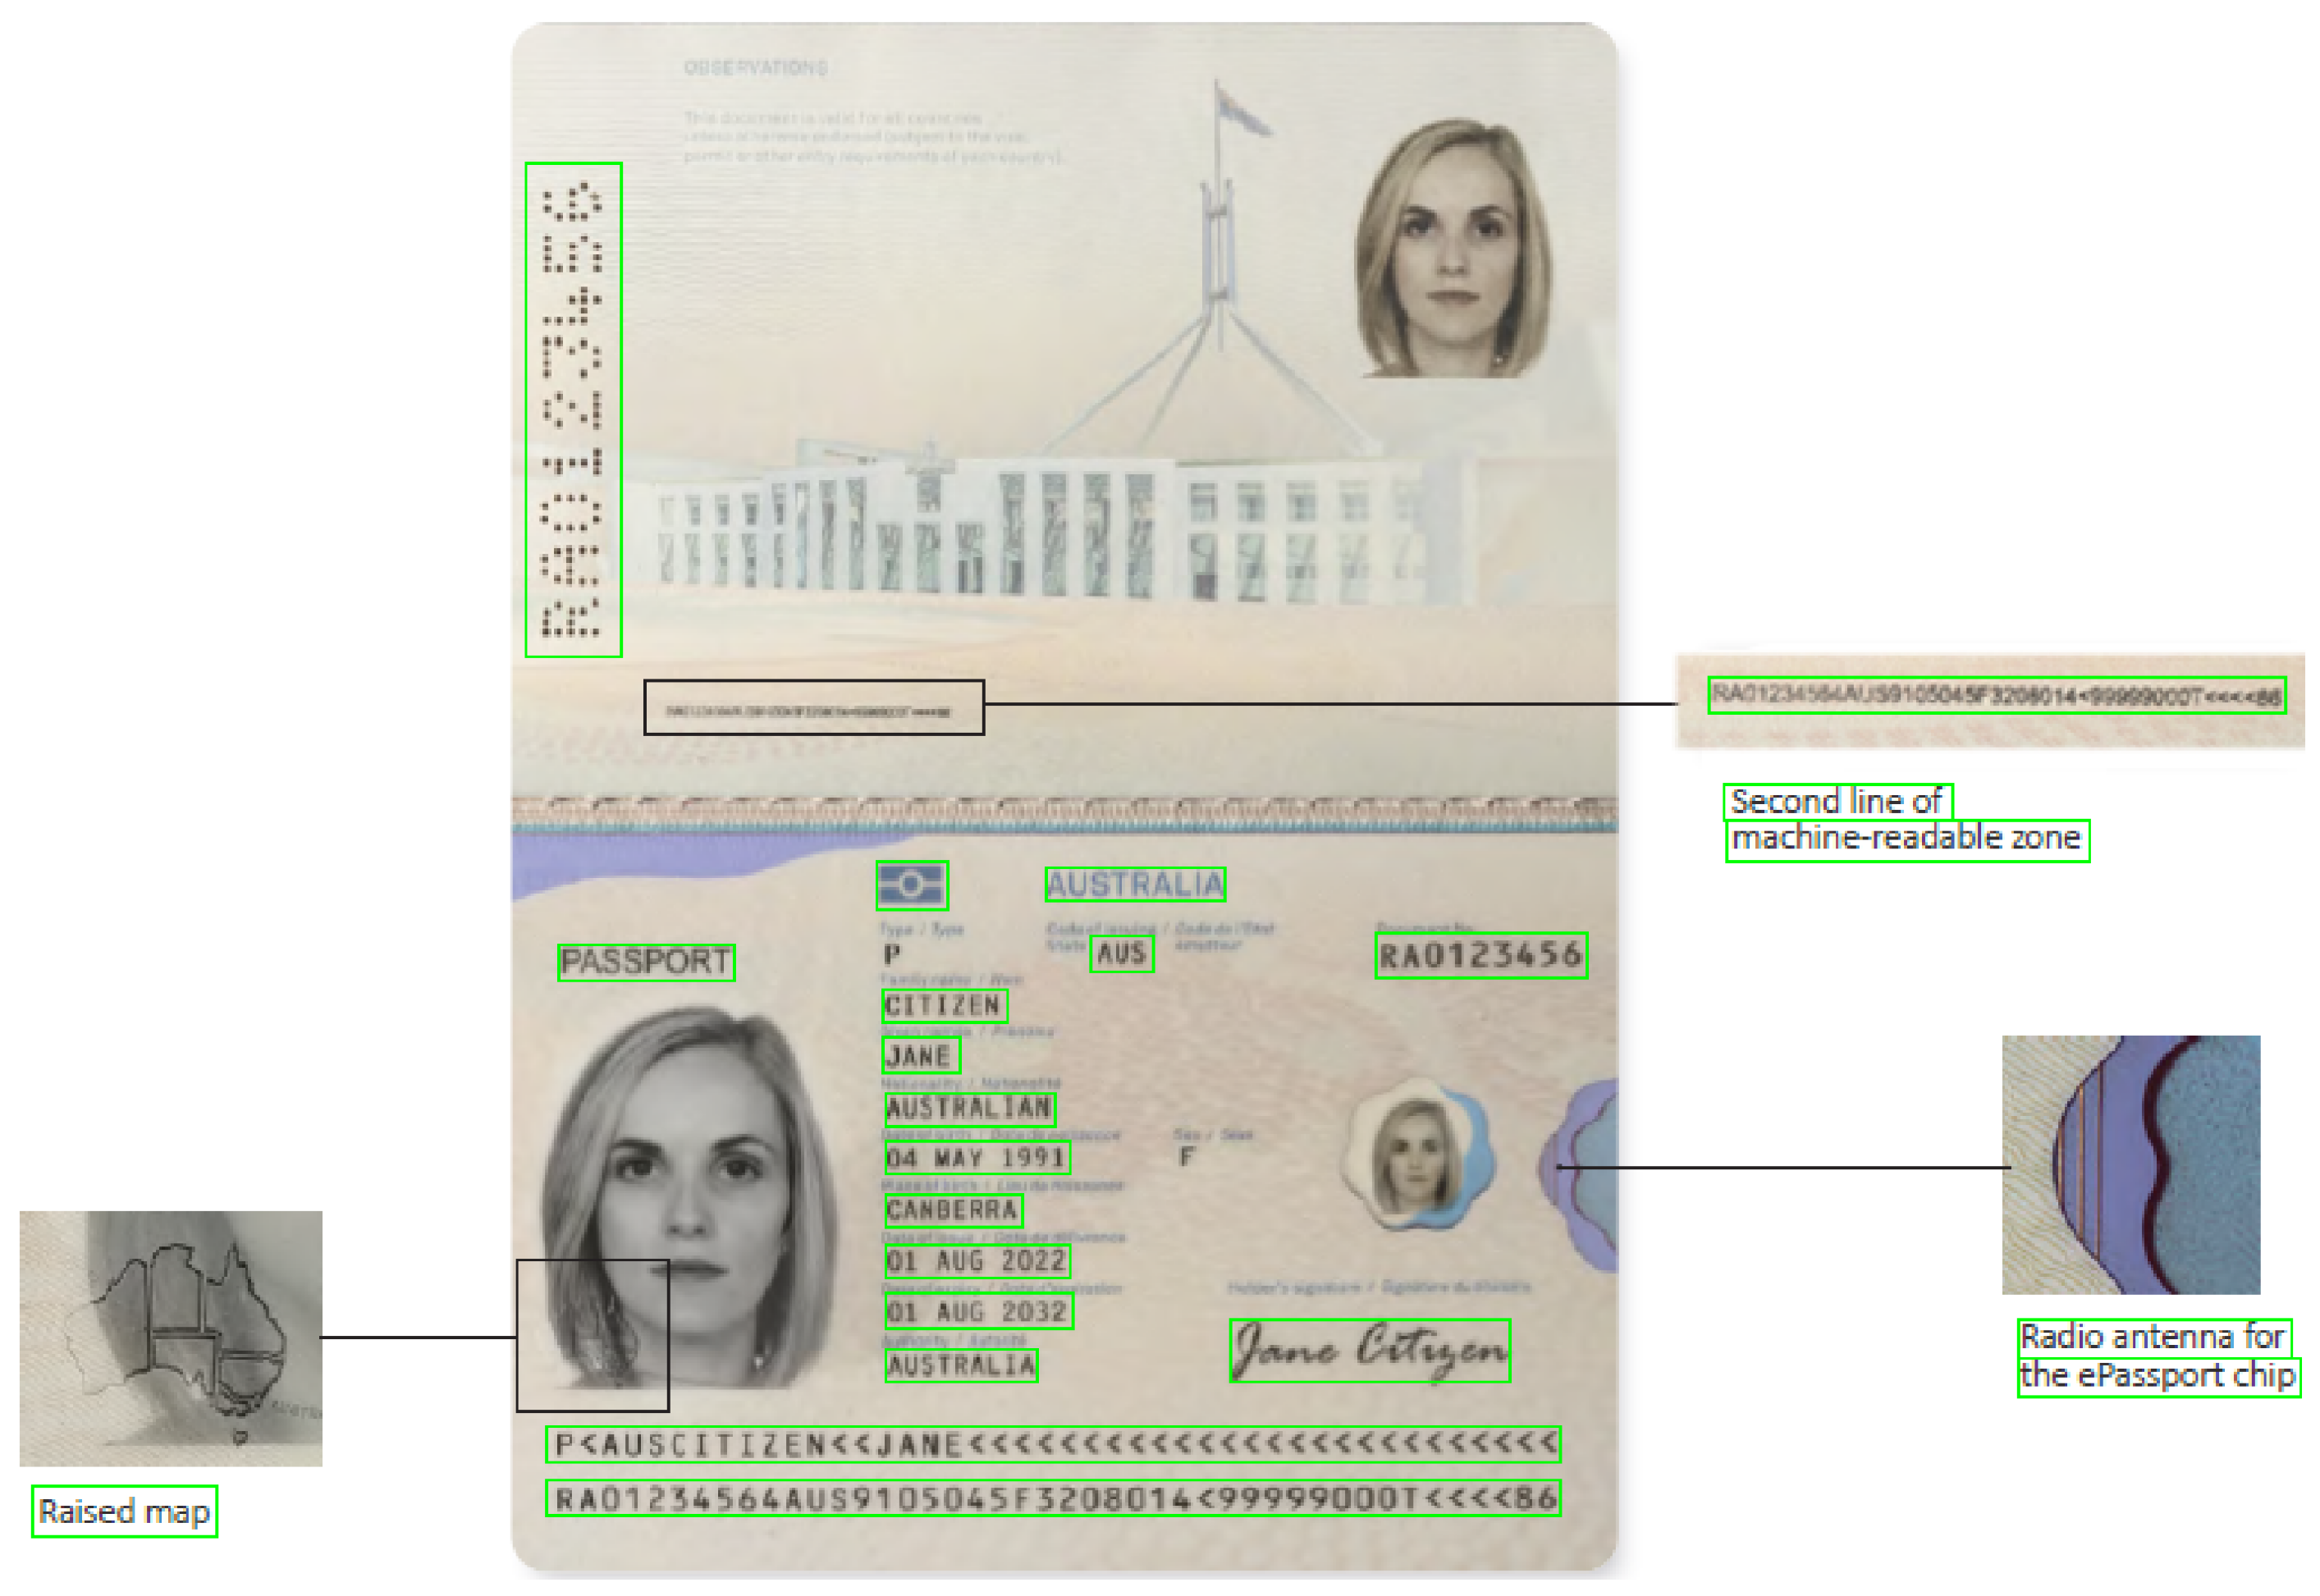

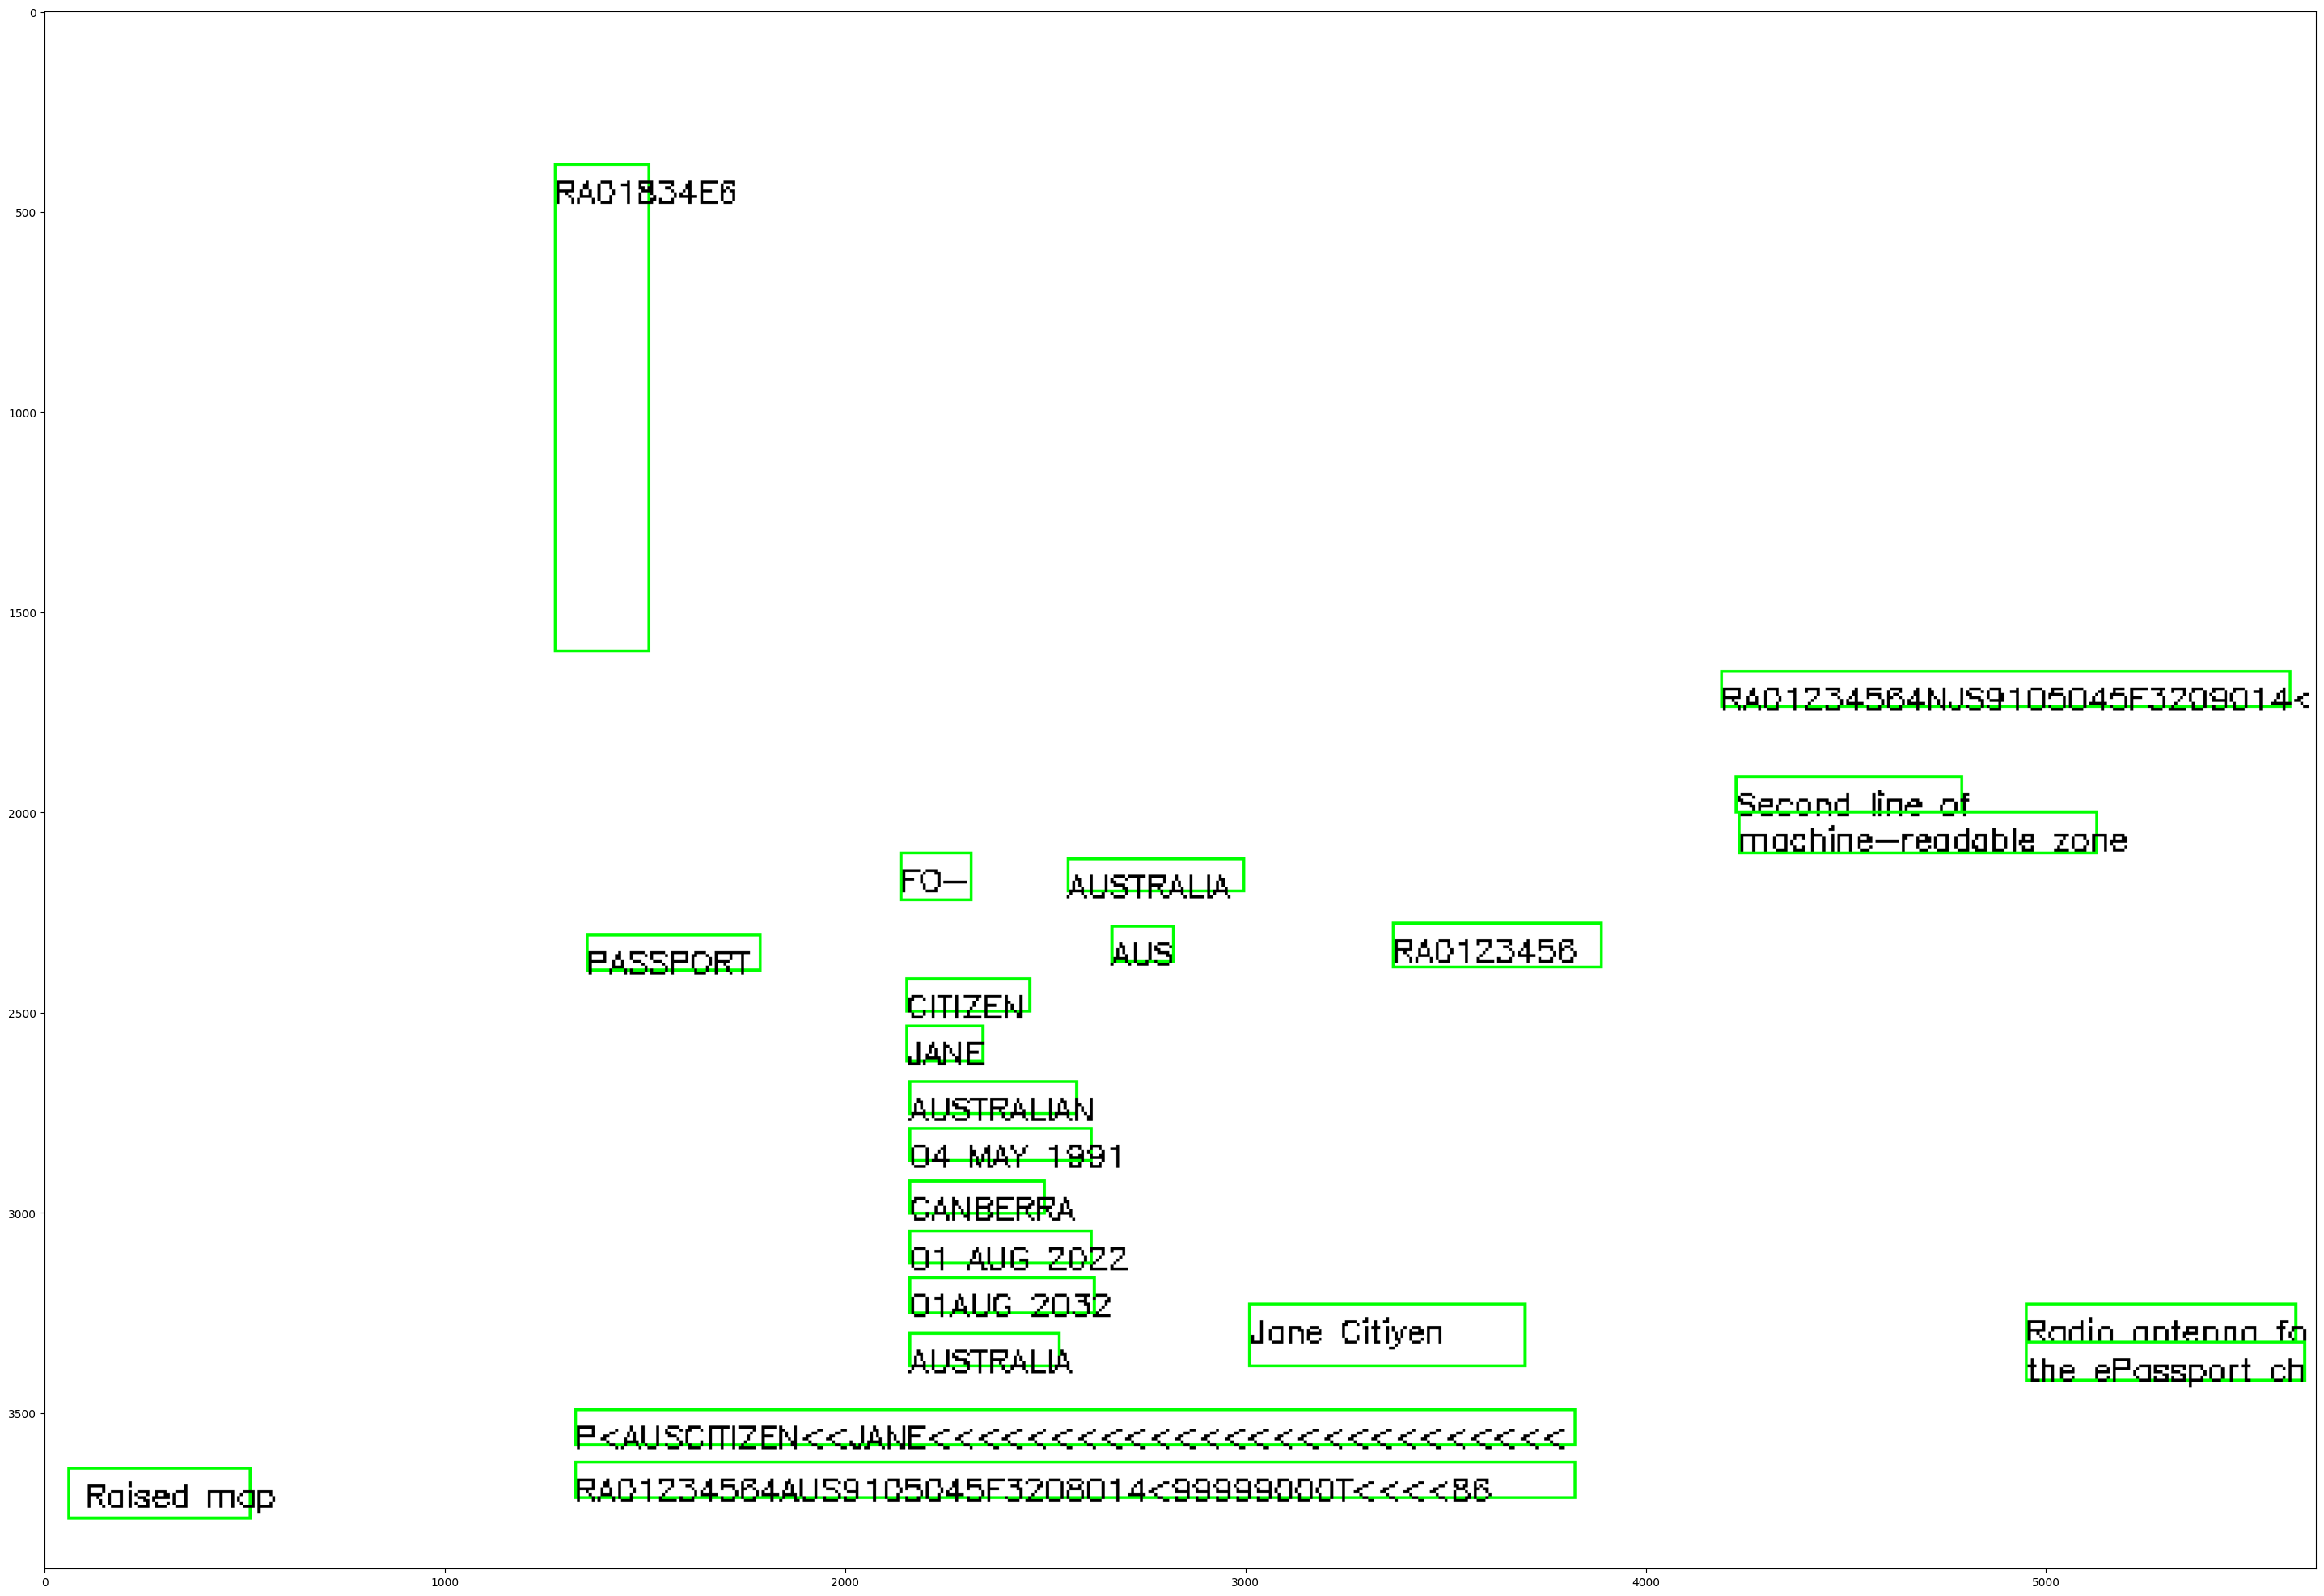

In [ ]:
#def main():

# init constants
pssprt_directory = "/content/drive/MyDrive/Colab Notebooks/OCR_trial_02_artifacts/pssprt_smpl"
licence_directory = "/content/drive/MyDrive/Colab Notebooks/OCR_trial_02_artifacts/licence_smpl"
img_extensions = [".jpg", ".png", ".webp"]#, ".avif"]

ocr_path_pssprt = ocr_paths_ls(pssprt_directory, img_extensions)                          # get image paths into a list readying for ocr'ing
ocr_path_licences = ocr_paths_ls(licence_directory, img_extensions)

ocr_sets = [ocr_path_licences, ocr_path_pssprt]

#for img_pth in ocr_path_pssprt:
#    run_ocr(img_pth, True)
#    break

#for img_pth in ocr_path_licences:
#    run_ocr(img_pth, True)
#    break
"""
for ocr_set in ocr_sets:
    for img_pth in ocr_set:
        show_im(img_pth)
        break
"""
for ocr_set in ocr_sets:
    for img_pth in [ocr_set[0]]:
        run_ocr(ocr_path=img_pth, show_boundbox_image=True, ocr_eng="paddle")
        #break

#if __name__ =="__main__":
#    main()